In [435]:
from sklearn.datasets import fetch_olivetti_faces
from skimage import feature
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

data = fetch_olivetti_faces()
X = data.images
Y = data.target

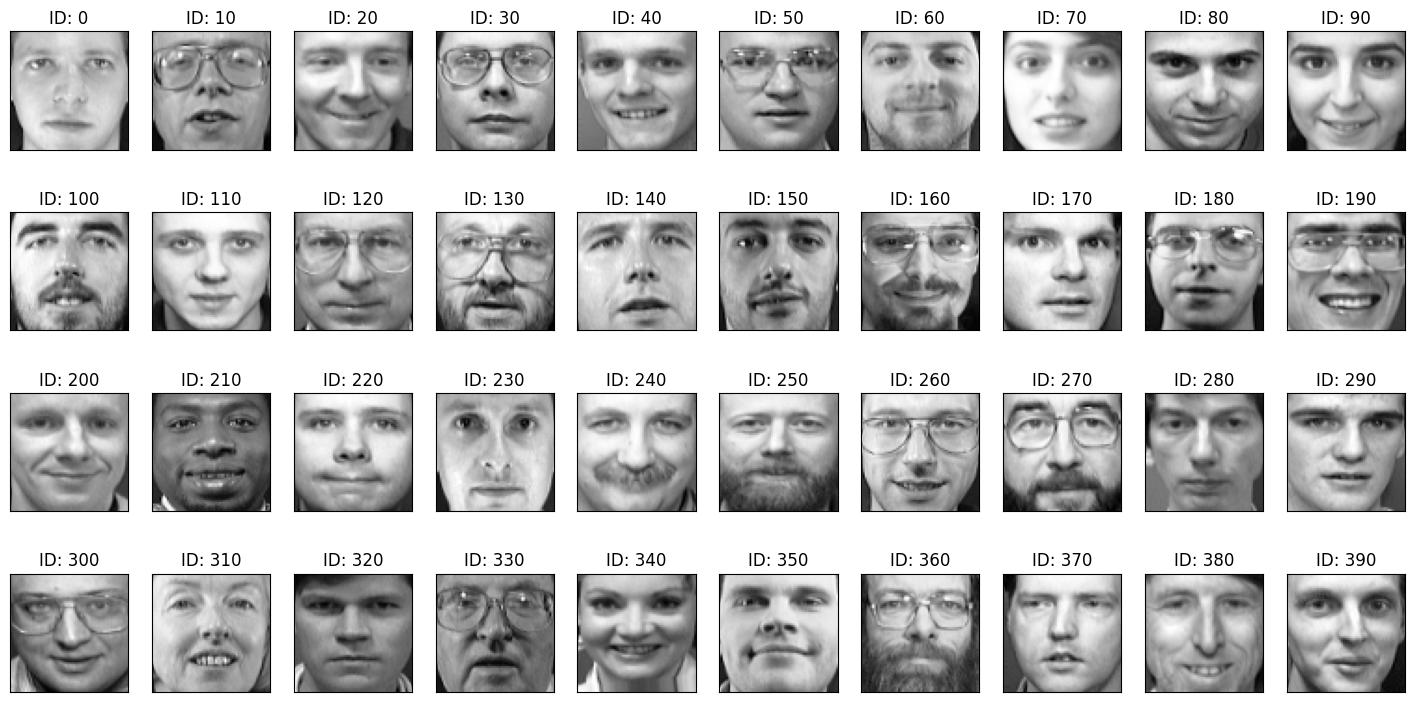

In [436]:
def displayImages(images, ids):
    fig, axarr = plt.subplots(4, 10, figsize=(18, 9))
    axarr = axarr.flatten()

    for id in ids:
        index = id*10
        axarr[id].imshow(images[index], cmap='gray')
        axarr[id].set_yticks([])
        axarr[id].set_xticks([])
        axarr[id].set_title("ID: %d" % index)

displayImages(X, np.unique(Y))

# Feature extraction

## 1. Local Binary Pattern

In [437]:
def getLBP(image, numPoints, radius):
    lbp = feature.local_binary_pattern(image, numPoints, radius, method='default')
    return lbp

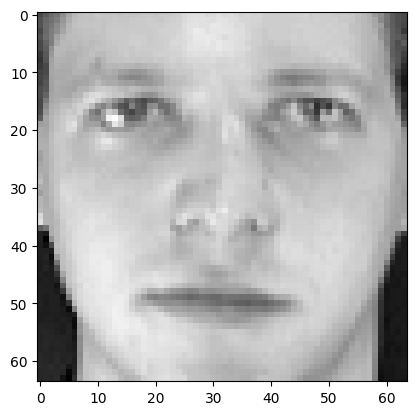

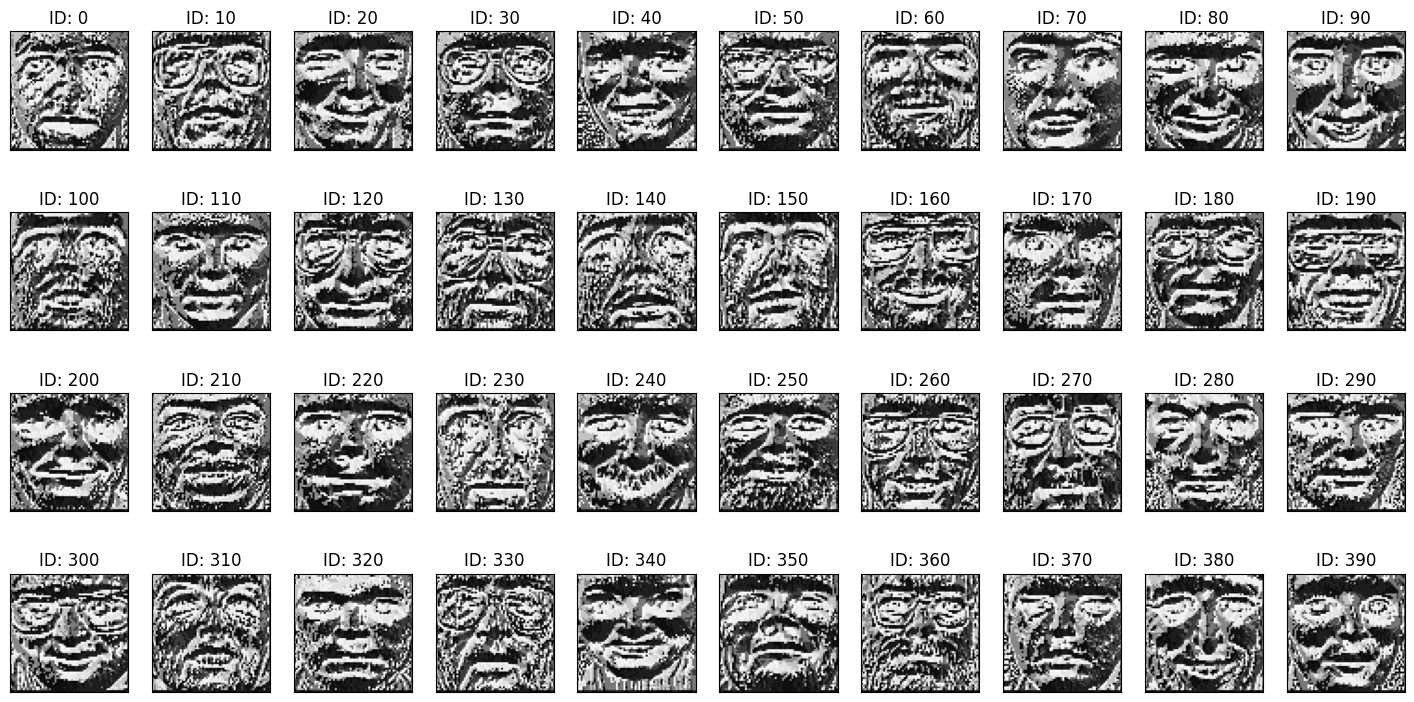

In [438]:
numpoints = np.ones(len(X), dtype=np.uint8) * 8
radius = np.ones(len(X), dtype=np.uint8) * 1
lbp_arr = np.array(list(map(getLBP, X, numpoints, radius)))

plt.imshow(X[0])
plt.imshow(X[0], cmap='gray')

displayImages(lbp_arr, np.unique(Y))

## 2. Histo_lbp()

In [439]:
def histo_lbp(image, numPoints, radius):
    lbp = getLBP(image, numPoints, radius)
    bins = int(lbp.max() + 1)
    hist = cv.calcHist([lbp.astype(np.float32)], [0], None, [bins], (0,float(bins)), accumulate=False)
    hist = cv.normalize(hist, hist)

    return hist

In [440]:
h = np.array(list(map(histo_lbp, X, numpoints, radius)))


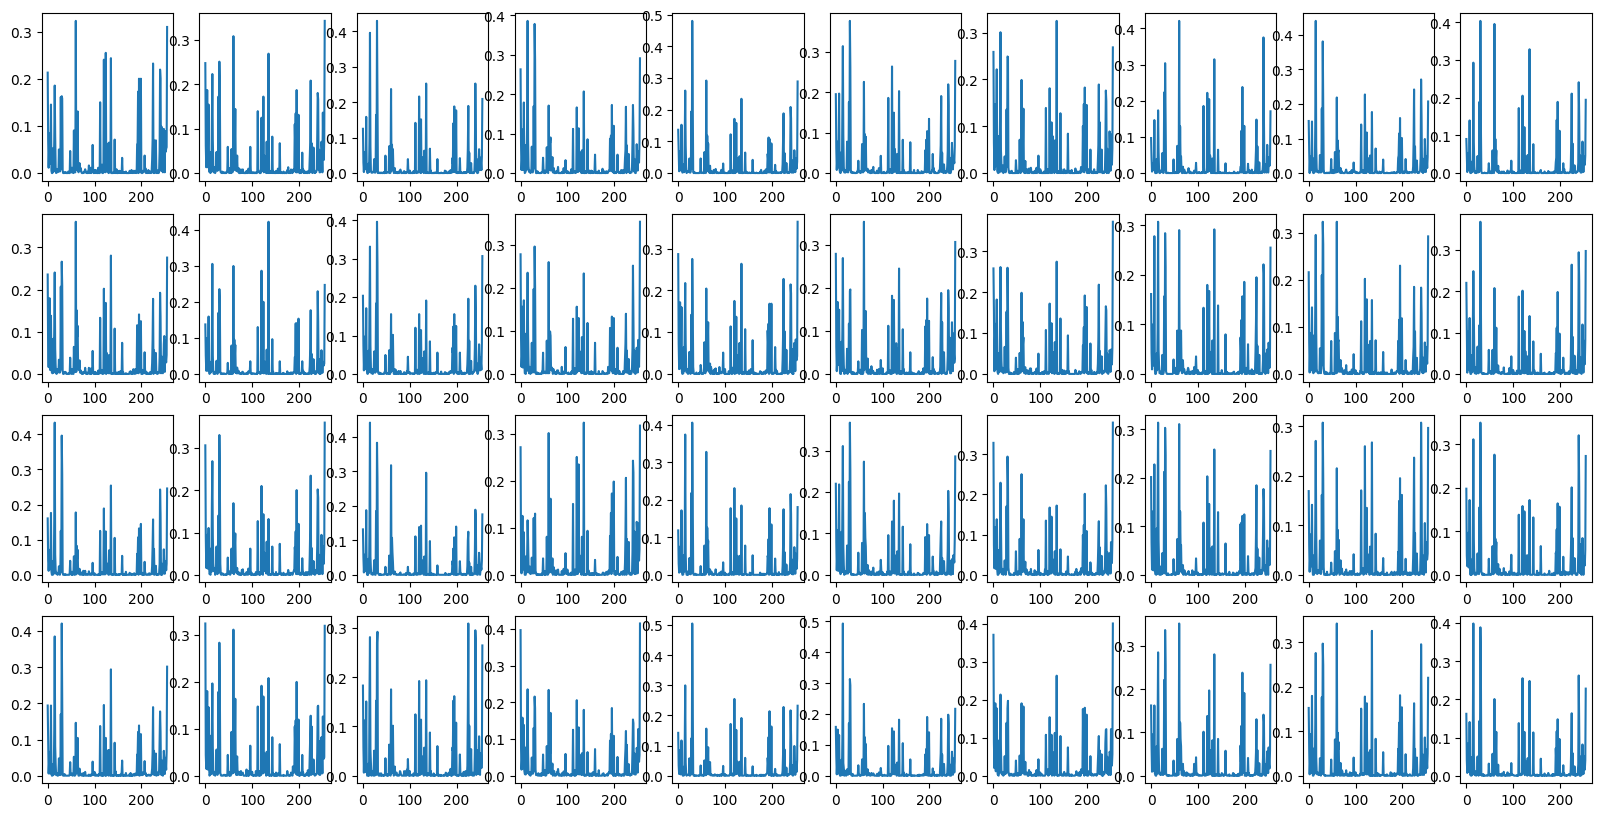

In [441]:
def showHist(images, ids):
    f, a = plt.subplots(4, 10, figsize=(20, 10))
    a = a.flatten()

    for id in ids:
        index = id*10
        a[id].plot(images[index])

showHist(h, np.unique(Y))

## 3. feature_extraction()

In [442]:
def feature_extraction(X, numpoints, radius):
    hists = np.array(list(map(histo_lbp, X, numpoints, radius)))
    hists = hists.reshape(hists.shape[0], hists.shape[1])

    classes = Y.reshape(400, 1)
    matrix = np.concatenate((hists, classes), axis=1)

    return matrix

numpoints = np.ones(len(X), dtype=np.uint8) * 16
radius = np.ones(len(X), dtype=np.uint8) * 2
mat = feature_extraction(X, numpoints, radius)

# Histogram Matching

## 1. histo_distance()

In [443]:
def histo_distance(P, Q):
    sim = cv.compareHist(P.astype(np.float32), Q.astype(np.float32), cv.HISTCMP_BHATTACHARYYA)
    return sim

# Main Module

## 1. Randomly Select

In [444]:
num = np.random.randint(len(X))

## 2. Display Random Image

([], [])

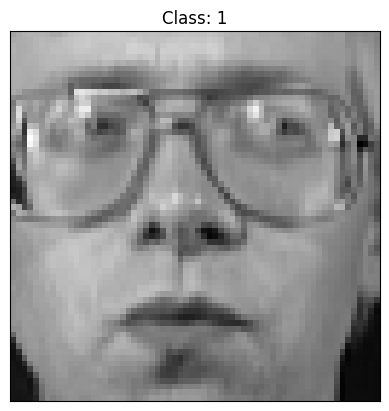

In [445]:
plt.imshow(X[num], cmap='gray')
plt.title("Class: %d" % Y[num])
plt.yticks([])
plt.xticks([])

0.12774925373963814
[0.23056455 0.23539219 0.24324274 0.24943155 0.26121876]
[69, 225, 223, 221, 222]


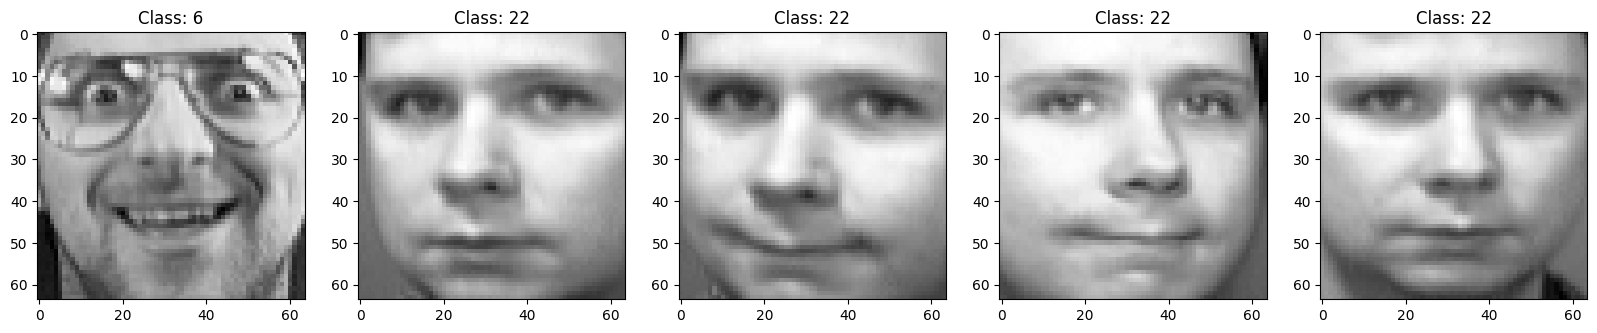

In [446]:
def displayFive(indexes, X, matrix):
    fig, axarr = plt.subplots(1, len(indexes), figsize=(20, 10))
    
    for i in range(0,len(indexes)):
        label = matrix[indexes[i]][-1]
        axarr[i].imshow(X[indexes[i]], cmap='gray')
        axarr[i].set_title("Class: %d" % label)

def image_retrieval(imageNum, X):
    numpoints = np.ones(len(X), dtype=int) * 8
    radius = np.ones(len(X), dtype=int)
    matrix = feature_extraction(X, numpoints, radius)

    histograms = np.delete(matrix, len(matrix[0])-1, 1)
    histograms = np.delete(histograms, imageNum, 0)

    hist = histo_lbp(X[imageNum], 8, 1)
    hist = hist.ravel()
    h = np.zeros((len(histograms), len(histograms[0])))
    hist = h + hist

    sims = np.array(list(map(histo_distance, histograms, hist)))

    sorted = np.sort(sims)

    best = sorted[-5:]
    print(sorted[0])
    print(best)

    indexes = []
    for max in best:
        indexes.append(np.where(sims == max)[0][0])

    print(indexes)
    displayFive(indexes, X, matrix)

image_retrieval(num, X)